# Bike Sharing Dataset Exploratory Analysis

## Import required packages

In [1]:
#Preprocessing

#The EDA process begins with loading the data into the environment, getting a quick look at it along with
#count of records and number of attributes. We will be making heavy use of pandas and numpy to perform data 
#manipulation and related tasks. For visualization purposes, we will use matplotlib and seaborn along with 
#pandas' visualization capabilities wherever possible.

# data manipulation 
import pandas as pd
import numpy as np

# plotting
import seaborn as sn
import matplotlib.pyplot as plt
# matplotlib magic command for Jupyter notebook
%matplotlib inline


# setting params
#params = {'legend.fontsize': 'x-large',
#          'figure.figsize': (30, 10),
#          'axes.labelsize': 'x-large',
#          'axes.titlesize':'x-large',
#          'xtick.labelsize':'x-large',
#          'ytick.labelsize':'x-large'}

sn.set_style('whitegrid')
sn.set_context('talk')

#plt.rcParams.update(params)
#pd.options.display.max_colwidth = 600

# pandas display data frames as tables
#from IPython.display import display, HTML

# modeling utilities
import scipy.stats as stats
from sklearn import preprocessing
import pydotplus
#from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor

## Load Dataset

In [2]:
hour_df = pd.read_csv('data\hour.csv')
print("Shape of dataset::{}".format(hour_df.shape))

Shape of dataset::(17379, 17)


In [3]:
#The dataset contains more than 17k records with 17 attributes. Let’s check the top few rows to see how
#the data looks. We use the head() utility from pandas
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Data Types and Summary Stats

In [4]:
#The data seems to have loaded correctly. Next, we need to check what data types pandas has inferred
#and if any of the attributes require type conversions. The following snippet helps us check the data types of
#all attributes.
hour_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [5]:
# dataset summary stats
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Standardize Attribute Names

In [6]:
#The attribute dteday would require type conversion from object (or string type) to timestamp.
#Attributes like season, holiday, weekday, and so on are inferred as integers by pandas, and they would
#require conversion to categoricals for proper understanding.
#Before jumping into type casting attributes, the following snippet cleans up the attribute names to make
#them more understandable and pythonic.
hour_df.rename(columns={'instant':'rec_id','dteday':'datetime','holiday':'is_holiday','workingday':'is_workingday',\
                        'weathersit':'weather_condition','hum':'humidity','mnth':'month','cnt':'total_count',\
                        'hr':'hour','yr':'year'},inplace=True) #Whether to return a new DataFrame. If True then value of copy is ignored.

## Typecast Attributes

In [7]:
#Now that we have attribute names cleaned up, we perform type-casting of attributes using utilities like
#pd.to_datetime() and astype(). The following snippet gets the attributes into proper data types.

# date time conversion
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

# categorical variables
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

## Visualize Attributes, Trends and Relationships

C:\Users\RUIZ\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0.5,1,'Season wise hourly distribution of counts')]

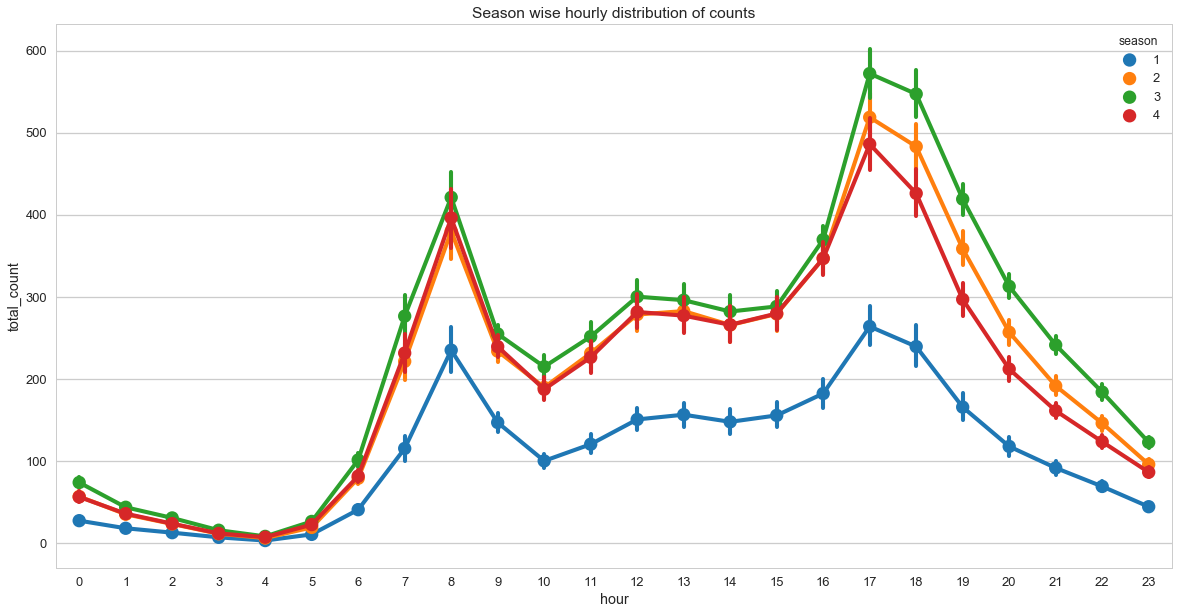

In [8]:
#Distribution and Trends

#The dataset after preprocessing (which we performed in the previous step) is ready for some visual
#inspection. We begin with visualizing hourly ridership counts across the seasons. The following snippet uses
#seaborn’s pointplot to visualize the same.

fig,ax = plt.subplots(figsize=(20, 10))
sn.pointplot(data=hour_df,x='hour',y='total_count',hue='season',ax=ax)
ax.set(title="Season wise hourly distribution of counts")

C:\Users\RUIZ\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0.5,1,'Weekday wise hourly distribution of counts')]

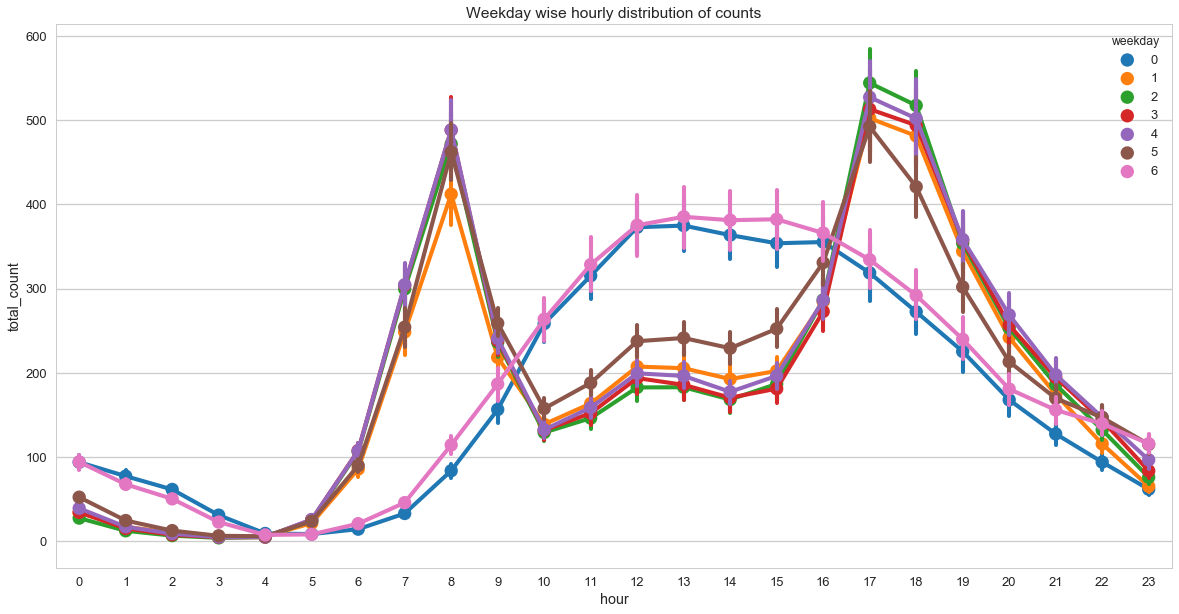

In [9]:
#The plot in Figure above shows similar trends for all seasons with counts peaking in the morning between
#7-9 am and in the evening between 4-6 pm, possibly due to high movement during start and end of office
#hours. The counts are lowest for the spring season, while fall sees highest riders across all 24 hours.

#Similarly, distribution of ridership across days of the week also presents interesting trends of higher
#usage during afternoon hours over weekends, while weekdays see higher usage during mornings and evenings.
#fig,ax = plt.subplots(figsize=(20, 10))
fig,ax = plt.subplots(figsize=(20, 10))
sn.pointplot(data=hour_df[['hour','total_count','weekday']],x='hour',y='total_count',hue='weekday',ax=ax)
ax.set(title="Weekday wise hourly distribution of counts")

## Monthly distribution of Total Counts

C:\Users\RUIZ\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0.5,1,'Monthly distribution of counts')]

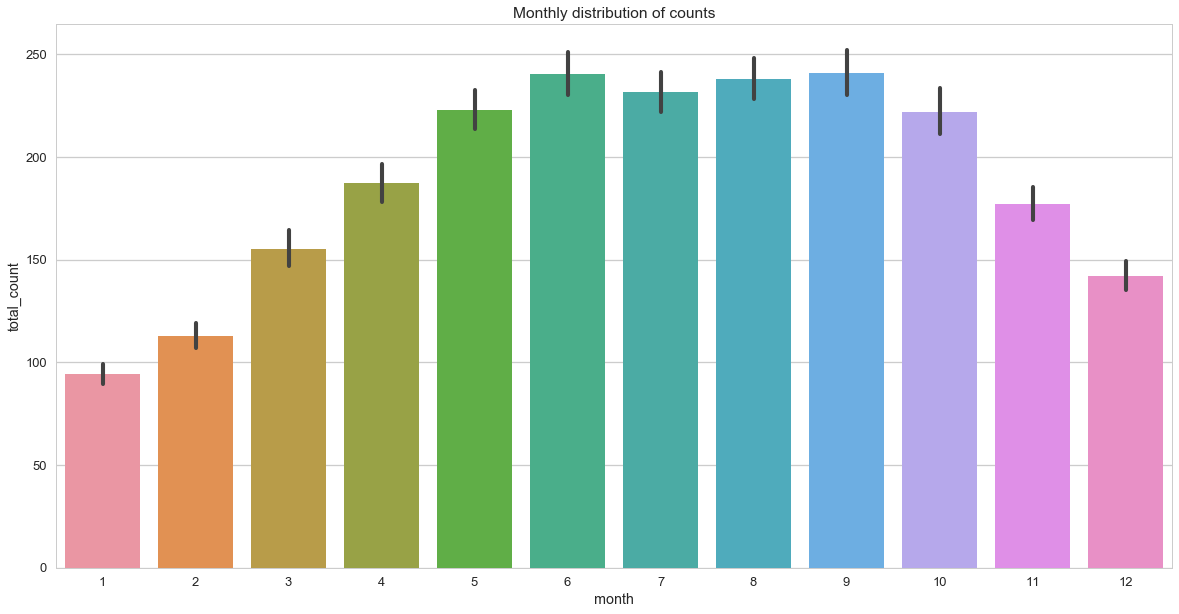

In [10]:
#Having observed hourly distribution of data across different categoricals, let’s see if there are any
#aggregated trends. The following snippet helps us visualize monthly ridership trends using seaborn’s barplot()
fig,ax = plt.subplots(figsize=(20, 10)) #figsize pone el tamaño del gráfico
sn.barplot(data=hour_df[['month','total_count']],x='month',y='total_count')
ax.set(title="Monthly distribution of counts")

C:\Users\RUIZ\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


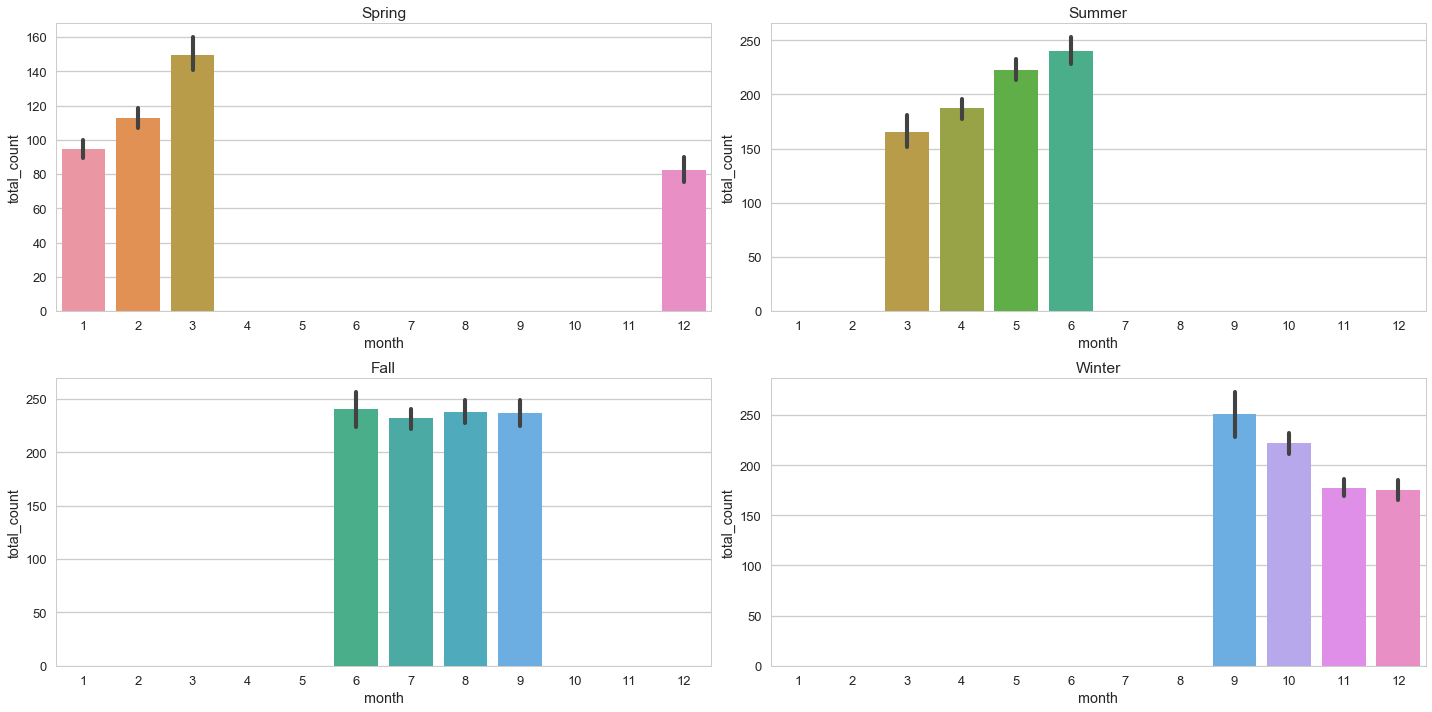

In [11]:
#The generated barplot showcases a definite trend in ridership based on month of the year. The
#months June-September see highest ridership. Looks like Fall is a good season for Bike Sharing programs in~Washington, D.C.

#We encourage you to try and plot the four seasons across different subplots as an exercise to employ
#plotting concepts and see the trends for each season separately.
spring_df = hour_df[hour_df.season==1]
summer_df = hour_df[hour_df.season==2]
fall_df = hour_df[hour_df.season==3]
winter_df = hour_df[hour_df.season==4]

fig,ax= plt.subplots(nrows=2,ncols=2,figsize=(20, 10))
sn.barplot(data=spring_df,x="month",y="total_count",ax=ax[0][0],)
ax[0][0].set(title="Spring")

sn.barplot(data=summer_df,x="month",y="total_count",ax=ax[0][1])
ax[0][1].set(title="Summer")

sn.barplot(data=fall_df,x="month",y="total_count",ax=ax[1][0])
ax[1][0].set(title="Fall")

sn.barplot(data=winter_df,x="month",y="total_count",ax=ax[1][1])  
ax[1][1].set(title="Winter")
plt.tight_layout() #para ajustar los márgenes de las gráficas y no se solapen

## Year Wise Count Distributions

C:\Users\RUIZ\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


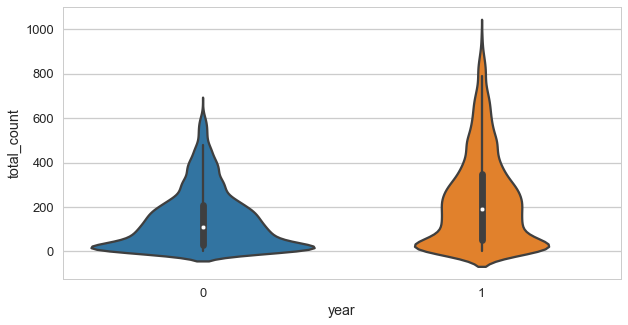

In [12]:
#Moving up the aggregation level, let’s look at the distribution at year level. Our dataset contains year
#value of 0 representing 2011 and 1 representing 2012. We use a violin plot to understand multiple facets of
#this distribution in a crisp format.

#Violin plots are similar to boxplots. Like boxplots, violin plots also visualize inter-quartile range and
#other summary statistics like mean/median. yet these plots are more powerful than standard boxplots due to
#their ability to visualize probability density of data. this is particularly helpful if data is multimodal.
fig,ax = plt.subplots(figsize=(10, 5))
sn.violinplot(data=hour_df,x="year",y="total_count")

## Working Day Vs Holiday Distribution

C:\Users\RUIZ\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


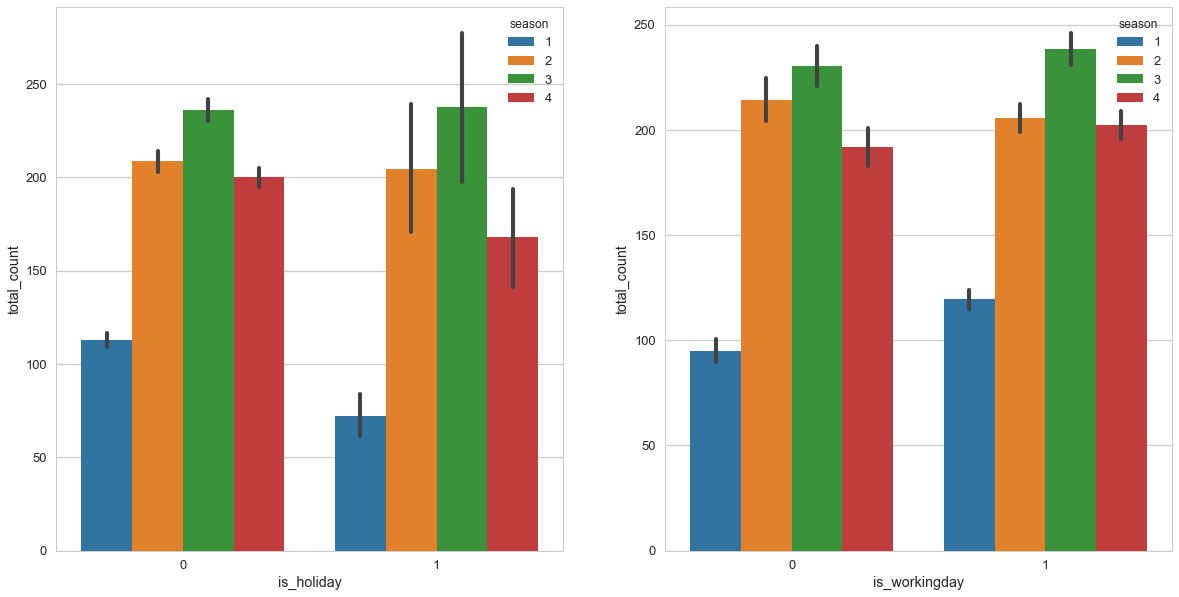

In [13]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize = (20,10))
sn.barplot(data=hour_df,x='is_holiday',y='total_count',hue='season',ax=ax1)
sn.barplot(data=hour_df,x='is_workingday',y='total_count',hue='season',ax=ax2)

## Outliers

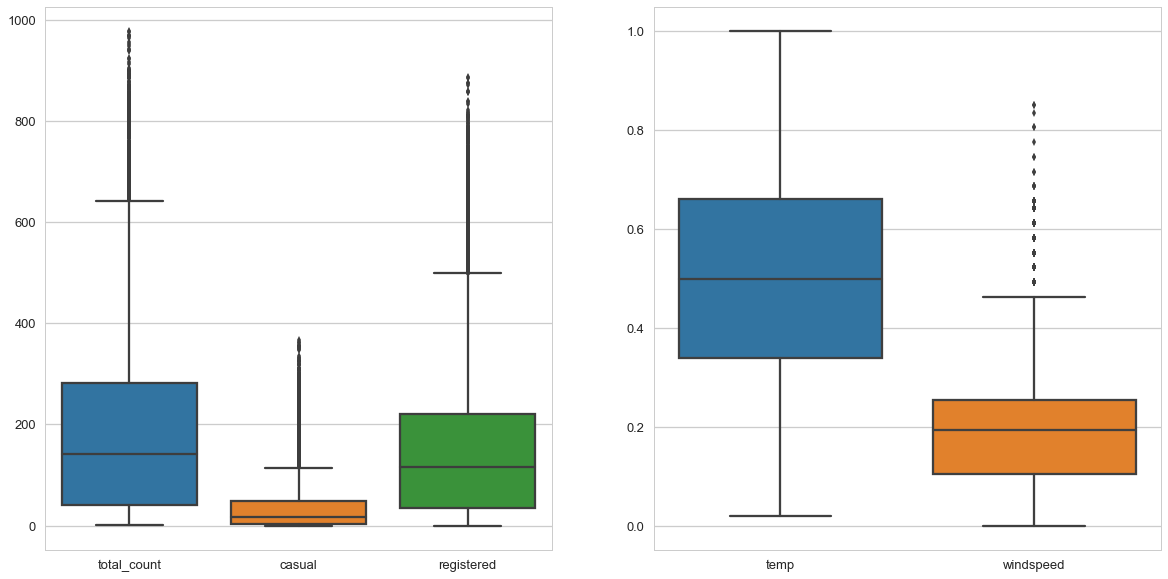

In [14]:
#Clearly helps us understand the multimodal distribution in both 2011 and 2012 ridership
#counts with 2011 having peaks at lower values as compared to 2012. The spread of counts is also much more
#for 2012, although the max density for both the years is between 100-200 rides.

#Outliers

#While exploring and learning about any dataset, it is imperative that we check for extreme and unlikely
#values. Though we handle missing and incorrect information while preprocessing the dataset, outliers are
#usually caught during EDA. Outliers can severely and adversely impact the downstream steps like modeling and the results.

#We usually utilize boxplots to check for outliers in the data. In the following snippet, we analyze outliers
#for numeric attributes like total_count, temperature, and wind_speed.
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize = (20,10))
sn.boxplot(data=hour_df[['total_count','casual','registered']],ax=ax1)
sn.boxplot(data=hour_df[['temp','windspeed']],ax=ax2)

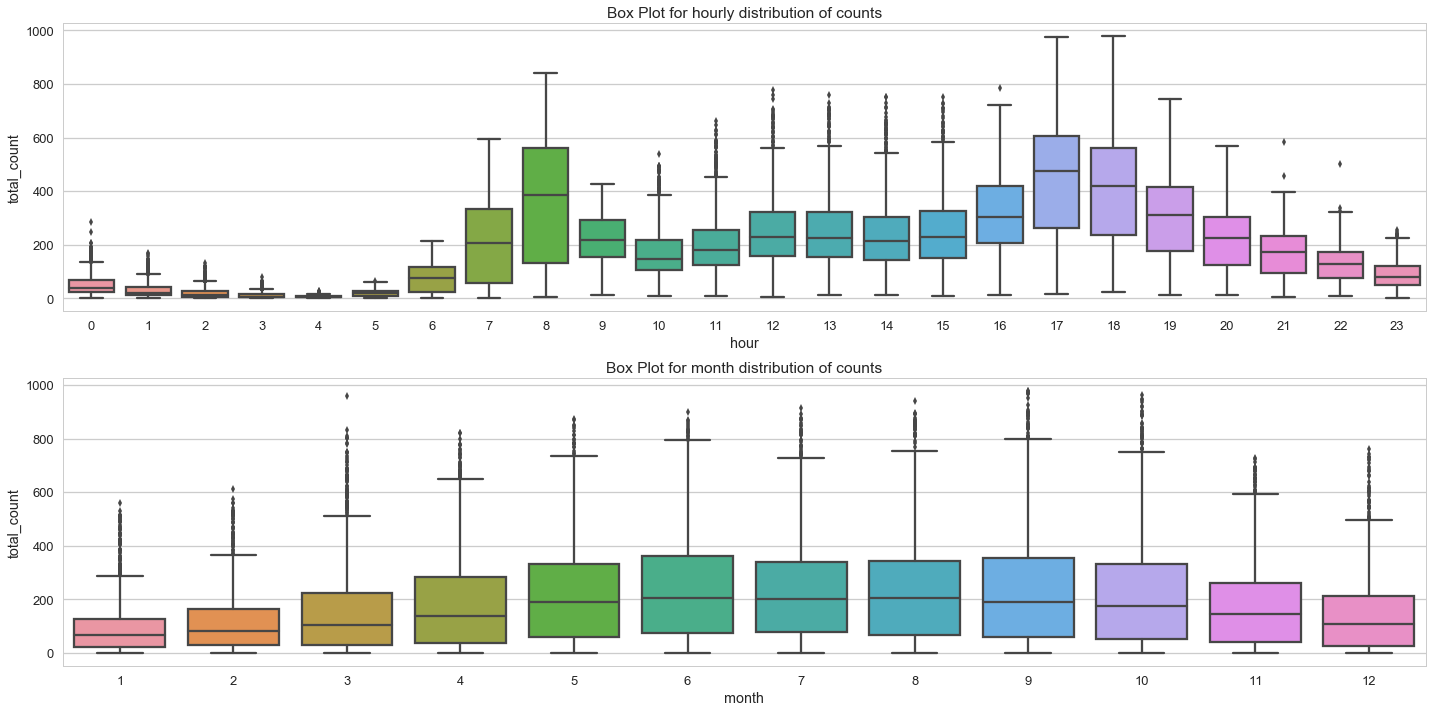

In [15]:
#The generated plot is shown above. We can easily mark out that for the three count related
#attributes, all of them seem to have a sizable number of outlier values. The casual rider distribution has
#overall lower numbers though. For weather attributes of temperature and wind speed, we find outliers only
#in the case of wind speed.

#We can similarly try to check outliers at different granularity levels like hourly, monthly, and so on.
fig, (ax1,ax2) = plt.subplots(nrows=2, figsize=(20, 10))
sn.boxplot(data=hour_df[['hour','total_count']],x="hour",y="total_count",ax=ax1)
ax1.set(title="Box Plot for hourly distribution of counts")
sn.boxplot(data=hour_df,x='month',y='total_count',ax=ax2)
ax2.set(title="Box Plot for month distribution of counts")
plt.tight_layout()

## Correlations

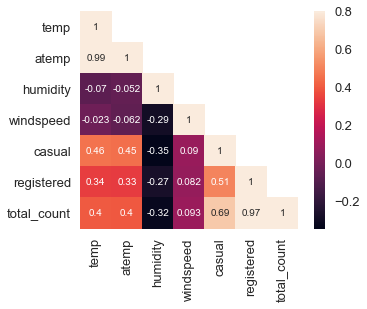

In [16]:
#Correlations

#Correlation helps us understand relationships between different attributes of the data. Since this chapter
#focuses on forecasting, correlations can help us understand and exploit relationships to build better models.
#It is important to understand that correlation does not imply causation. 

#The following snippet first prepares a correlational matrix using the pandas utility function corr().
#It then uses a heat map to plot the correlation matrix.
corrMatt = hour_df[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sn.heatmap(corrMatt, mask=mask, vmax=.8, square=True,annot=True)

# Bike Sharing Dataset Linear Modeling

## Encode Categoricals (One Hot Encoding)

In [17]:
#The two count variables, registered and casual, show obvious strong correlation to total_count.
#Similarly, temp and atemp show high correlation. wind_speed and humidity have slight negative correlation.
#Overall, none of the attributes show high correlational statistics.

#The dataset was analyzed and certain transformations like renaming attributes and type casting were 
#performed earlier. Since the dataset contains multiple categorical variables, it is imperative
#that we encode the nominal ones before we use them in our modeling process.

#The following snippet showcases the function to one hot encode categorical variables

def fit_transform_ohe(df,col_name):
    """This function performs one hot encoding for the specified
        column.
    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        col_name: the column to be one hot encoded
    Returns:
        tuple: label_encoder, one_hot_encoder, transformed column as pandas Series
    """
    # label encode the column
    le = preprocessing.LabelEncoder()
    le_labels = le.fit_transform(df[col_name])
    df[col_name+'_label'] = le_labels
    
    # one hot encoding
    ohe = preprocessing.OneHotEncoder()
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return le,ohe,features_df

#We use the fit_transform_ohe() function along with transform_ohe() to encode the categoricals.
#The Label and One Hot encoders are available as part of scikit-learn’s preprocessing module.

# given label encoder and one hot encoder objects, 
# encode attribute to ohe
def transform_ohe(df,le,ohe,col_name):
    """This function performs one hot encoding for the specified
        column using the specified encoder objects.

    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        le(Label Encoder): the label encoder object used to fit label encoding
        ohe(One Hot Encoder): the onen hot encoder object used to fit one hot encoding
        col_name: the column to be one hot encoded

    Returns:
        tuple: transformed column as pandas Series

    """
    # label encode
    col_labels = le.transform(df[col_name])
    df[col_name+'_label'] = col_labels
    
    # ohe 
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return features_df

## Train-Test Split

In [18]:
#we usually divide the dataset at hand into training and testing sets
#to evaluate the performance of our models. In this case as well, we use scikit-learn’s train_test_split() 
#function available through model_selection module. We split our dataset into 67% and 33% as train and test, respectively.

X, X_test, y, y_test = train_test_split(hour_df.iloc[:,0:-3],hour_df.iloc[:,-1],test_size=0.33,random_state=42)

X.reset_index(inplace=True)
y = y.reset_index()

X_test.reset_index(inplace=True)
y_test = y_test.reset_index()

print("Training set::{}{}".format(X.shape,y.shape))
print("Testing set::{}".format(X_test.shape))

Training set::(11643, 15)(11643, 2)
Testing set::(5736, 15)


## Normality Test

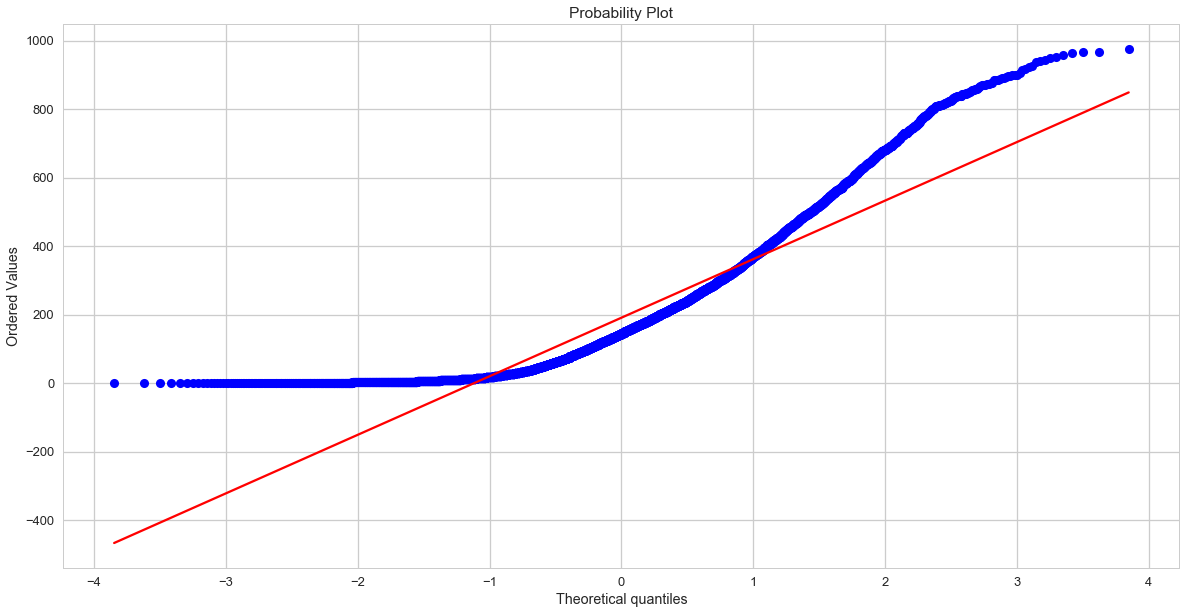

In [19]:
fig = plt.subplots(figsize=(20,10))
stats.probplot(y.total_count.tolist(), dist="norm", plot=plt)
plt.show()

In [20]:
cat_attr_list = ['season','is_holiday','weather_condition','is_workingday','hour','weekday','month','year']
numeric_feature_cols = ['temp','humidity','windspeed','hour','weekday','month','year']
subset_cat_features =  ['season','is_holiday','weather_condition','is_workingday']

In [21]:
#The following snippet loops through the list of categorical variables to transform and prepare a list of encoded attributes.

encoded_attr_list = []
for col in cat_attr_list:
    return_obj = fit_transform_ohe(X,col)
    encoded_attr_list.append({'label_enc':return_obj[0],'ohe_enc':return_obj[1],'feature_df':return_obj[2],'col_name':col})

In [22]:
#though we have transformed all categoricals into their one-hot encodings, note that ordinal
#attributes such as hour, weekday, and so on do not require such encoding.

#Next, we merge the numeric and one hot encoded categoricals into a dataframe that we will use for our modeling purposes.

feature_df_list = [X[numeric_feature_cols]]
feature_df_list.extend([enc['feature_df'] for enc in encoded_attr_list if enc['col_name'] in subset_cat_features])

train_df_new = pd.concat(feature_df_list, axis=1)
print("Shape::{}".format(train_df_new.shape))

#e prepared a new dataframe using numeric and one hot encoded categorical attributes from the
#riginal training dataframe. The original dataframe had 10 such attributes (including both numeric and
#ategoricals). Post this transformation, the new dataframe has 19 attributes due to one hot encoding of the ategoricals.

Shape::(11643, 19)


## Linear Regression

In [23]:
#we’ll get started with the model building.
#The linear regression model is exposed through scikit-learn’s linear_model module. Like all Machine
#Learning algorithms in scikit, this also works on the familiar fit() and predict() theme. The following
#snippet prepares the linear regression object for us

X = train_df_new
y= y.total_count.values.reshape(-1,1)
lin_reg = linear_model.LinearRegression()

In [24]:
#One simple way of proceeding would be call the fit() function to build our linear regression model
#and then call the predict() function on the test dataset to get the predictions for evaluation. We also want to
#keep in mind the aspects of overfitting and reduce its affects and obtain a generalizable model. As discussed
#in the previous section and earlier chapters, cross validation is one method to keep overfitting in check.
#We thus use the k-fold cross validation (specifically 10-fold) as shown in the following snippet.

predicted = cross_val_predict(lin_reg, X, y, cv=10)

#The function cross_val_predict() is exposed through model_selection module of sklearn. This
#function takes the model object, predictors, and targets as inputs. We specify the k in k-fold using the cv 
#parameter. In our example, we use 10-fold cross validation. This function returns cross validated prediction 
#values as fitted by the model object.

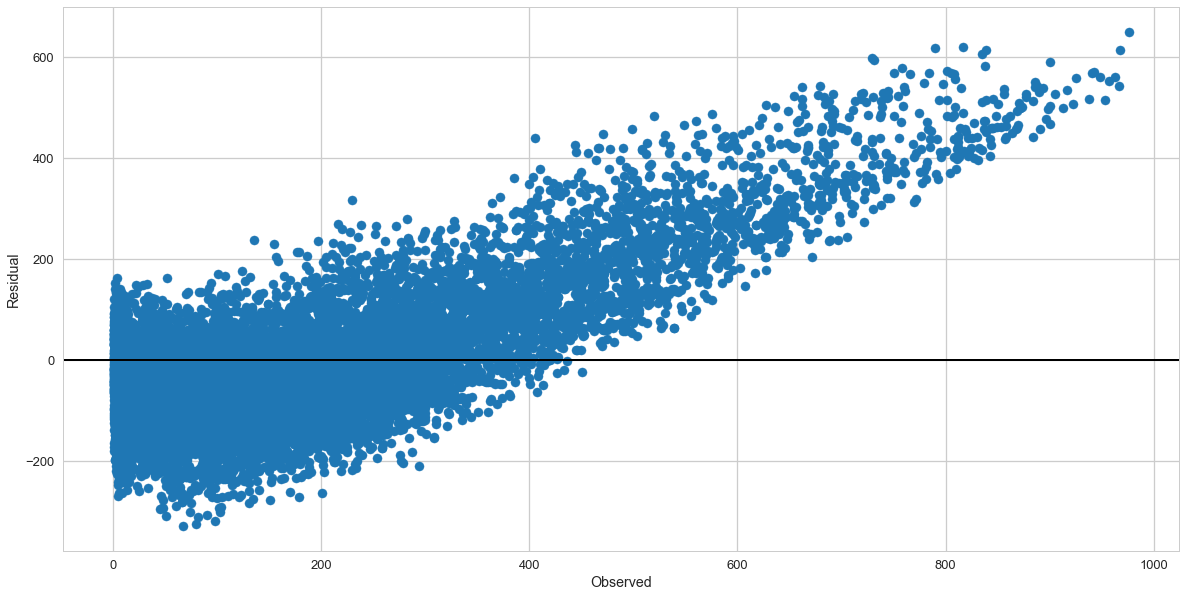

In [25]:
#We use scatter plot to analyze our predictions. The following snippet uses matplotlib to generate 
#scatter plot between residuals and observed values.

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(y, y-predicted)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

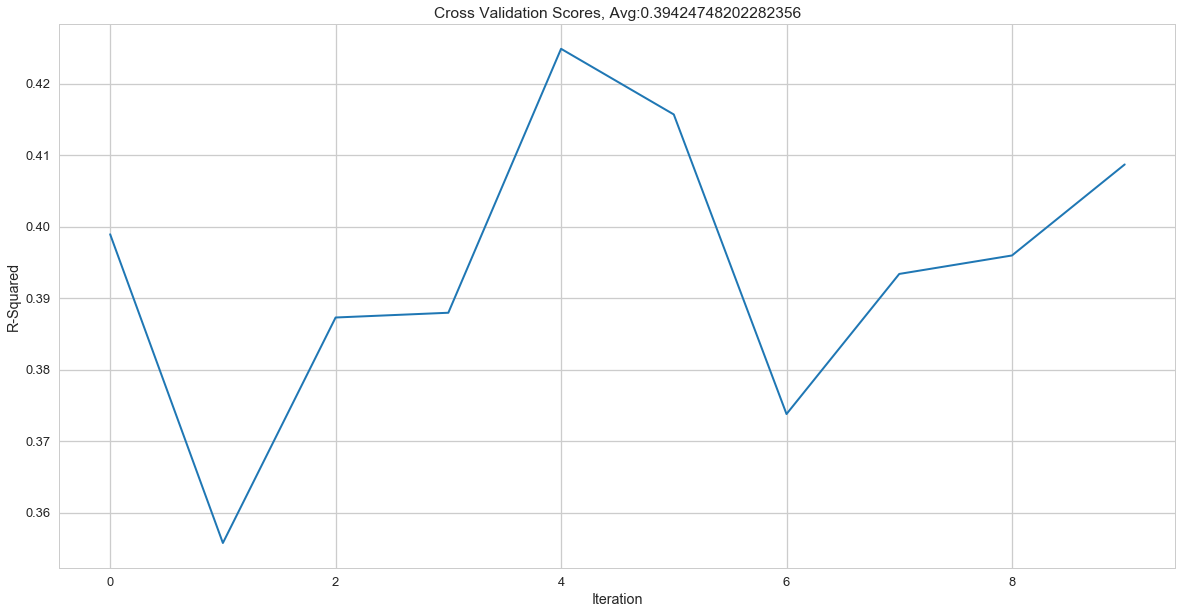

In [26]:
#The plot above clearly violates the homoscedasticity assumption, which is about residuals
#being random and not following any pattern. To further quantify our findings related to the model, we
#plot the cross-validation scores. We use the cross_val_score() function available again as part of the
#model_selection module

r2_scores = cross_val_score(lin_reg, X, y, cv=10)
mse_scores = cross_val_score(lin_reg, X, y, cv=10,scoring='neg_mean_squared_error')

fig, ax = plt.subplots(figsize=(20,10))
ax.plot([i for i in range(len(r2_scores))],r2_scores,lw=2)
ax.set_xlabel('Iteration')
ax.set_ylabel('R-Squared')
ax.title.set_text("Cross Validation Scores, Avg:{}".format(np.average(r2_scores)))
plt.show()

#The r-squared or the coefficient of determination is 0.39 on an average for 10-fold cross validation. This
#points to the fact that the predictor is only able to explain 39% of the variance in the target variable.
#You are encouraged to plot and confirm the normality of data. It is important to understand if the data
#can be modeled by a linear model or not.

In [27]:
print("R-squared::{}".format(r2_scores))
print("MSE::{}".format(mse_scores))

R-squared::[0.39894459 0.35575732 0.3873037  0.38796861 0.42489499 0.41571164
 0.37379762 0.39339864 0.39598159 0.40871611]
MSE::[-19612.38349313 -20800.77110185 -20256.54013607 -18545.99033804
 -18746.57816436 -21015.35560028 -21549.12876053 -21567.27946203
 -21041.49356425 -18899.05989574]


In [28]:
#Testing

#The linear regression model prepared and evaluated in the training phase needs to be checked for its
#performance on a completely un-seen dataset, the testing dataset. At the beginning of this section, we used
#the train_test_split() function to keep a dataset specifically for testing purposes.

#But before we can use the test dataset on the learned regression line, we need to make sure the
#attributes have been through the same preprocessing in both training and testing sets. Since we transformed
#categorical variables into their one hot encodings in the train dataset, in the following snippet we perform
#the same actions on the test dataset as well.

test_encoded_attr_list = []
for enc in encoded_attr_list:
    col_name = enc['col_name']
    le = enc['label_enc']
    ohe = enc['ohe_enc']
    test_encoded_attr_list.append({'feature_df':transform_ohe(X_test,le,ohe,col_name),'col_name':col_name})
test_feature_df_list = [X_test[numeric_feature_cols]]
test_feature_df_list.extend([enc['feature_df'] for enc in test_encoded_attr_list if enc['col_name'] in subset_cat_features])
test_df_new = pd.concat(test_feature_df_list, axis=1)
print("Shape::{}".format(test_df_new.shape))

Shape::(5736, 19)


In [29]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Test Dataset Performance

In [30]:
test_encoded_attr_list = []

for enc in encoded_attr_list:
    col_name = enc['col_name']
    le = enc['label_enc']
    ohe = enc['ohe_enc']
    test_encoded_attr_list.append({'feature_df':transform_ohe(X_test, le,ohe, col_name),'col_name':col_name})    
    
test_feature_df_list = [X_test[numeric_feature_cols]]
test_feature_df_list.extend([enc['feature_df'] \
                             for enc in test_encoded_attr_list \
                             if enc['col_name'] in subset_cat_features])

test_df_new = pd.concat(test_feature_df_list, axis=1) 
print("Shape::{}".format(test_df_new.shape))

Shape::(5736, 19)


In [31]:
#The transformed test dataset is shown
test_df_new.head()

,temp,humidity,windspeed,hour,weekday,month,year,season_1,season_2,season_3,season_4,is_holiday_0,is_holiday_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4,is_workingday_0,is_workingday_1
0,0.80,0.27,0.1940,19,6,6,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.24,0.41,0.2239,20,1,1,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.32,0.66,0.2836,2,5,10,0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.78,0.52,0.3582,19,2,5,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.26,0.56,0.3881,0,4,1,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [32]:
#The final piece of the puzzle is to use the predict() function of the LinearRegression object and
#compare our results/predictions.
X_test = test_df_new
y_test = y_test.total_count.values.reshape(-1,1)
y_pred = lin_reg.predict(X_test)
residuals = y_test-y_pred

In [33]:
r2_score = lin_reg.score(X_test,y_test)
print("R-squared::{}".format(r2_score))
print("MSE: %.2f"
      % metrics.mean_squared_error(y_test, y_pred))

R-squared::0.402440968267343
MSE: 19063.00


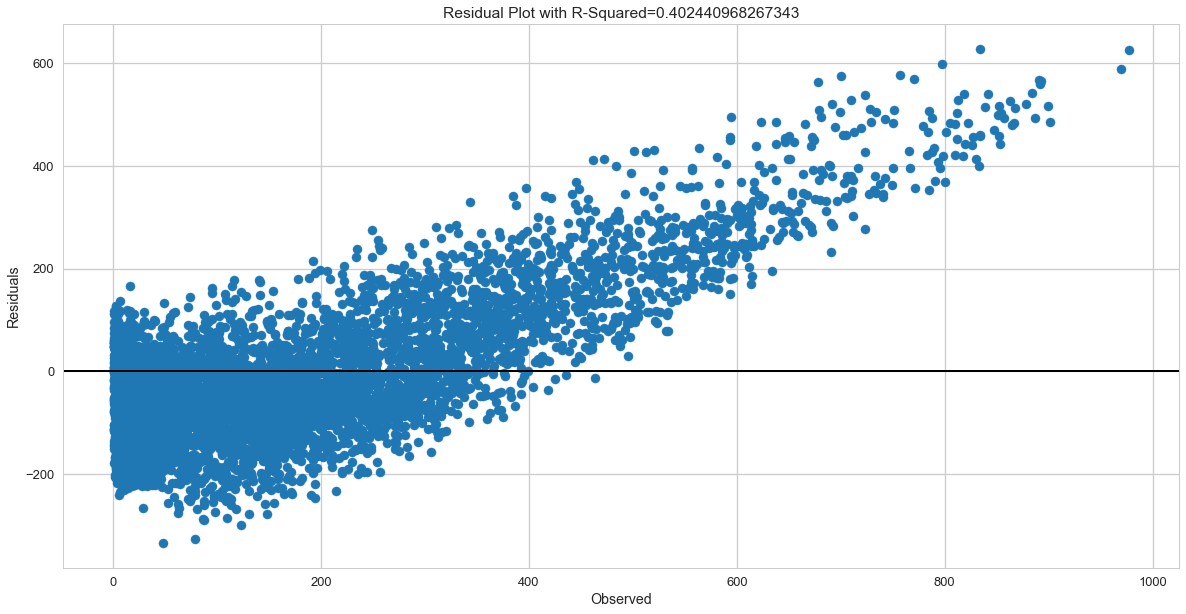

In [34]:
#We also calculate the residuals and use them to prepare the residual plot, similar to the one we created 
#during training step

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot with R-Squared={}".format(np.average(r2_score)))
plt.show()

#The generated plot shows an R-squared that is comparable to training performance.

## Stats Models

In [35]:
import statsmodels.api as sm

# Set the independent variable
X = X.values.tolist()

# This handles the intercept. 
# Statsmodel takes 0 intercept by default
X = sm.add_constant(X)

X_test = X_test.values.tolist()
X_test = sm.add_constant(X_test)


# Build OLS model
model = sm.OLS(y, X)
results = model.fit()

# Get the predicted values for dependent variable
pred_y = results.predict(X_test)

# View Model stats
print(results.summary())

C:\Users\RUIZ\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     508.2
Date:                Sun, 16 Sep 2018   Prob (F-statistic):               0.00
Time:                        22:36:17   Log-Likelihood:                -74221.
No. Observations:               11643   AIC:                         1.485e+05
Df Residuals:                   11627   BIC:                         1.486e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3509     11.086     -0.122      0.9

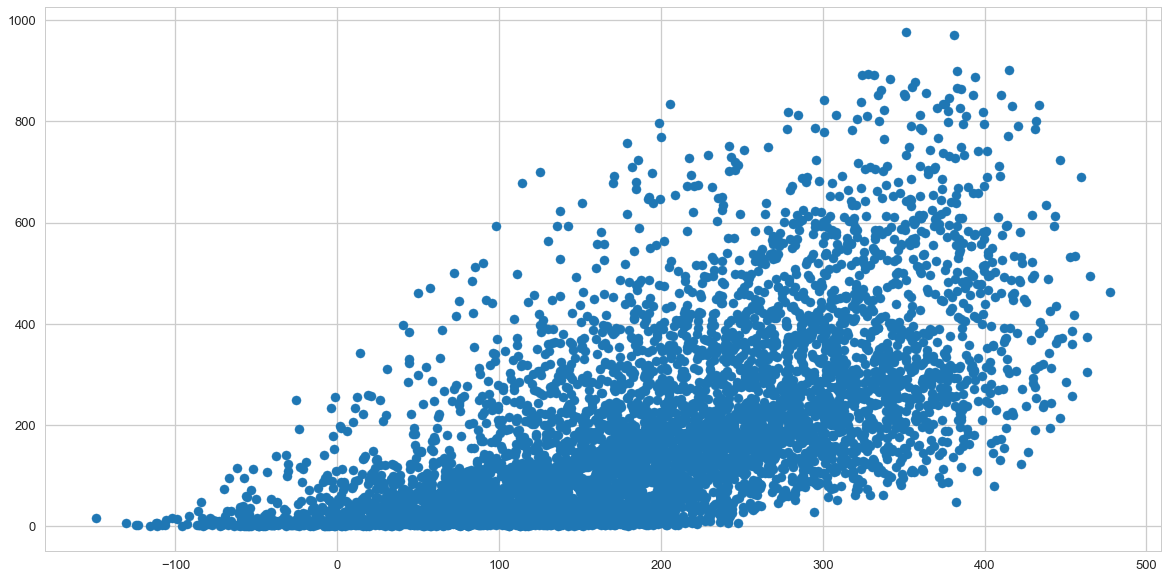

In [36]:
fig = plt.subplots(figsize=(20,10))
plt.scatter(pred_y,y_test)

# Bike Sharing Dataset using Decision Tree Regressor


## Train-Test Split

In [37]:
#It is clearly evident from our evaluation that the linear regression model is unable to model the data to
#generate decent results. Though it should be noted that the model is performing equally on both training
#and testing datasets. It seems like a case where we would need to model this data using methods that can
#model non-linear relationships.

#Training

#Similar to the process with linear regression, we will use the same preprocessed dataframe train_df_new
#with categoricals transformed into one hot encoded form along with other numerical attributes. We also
#split the dataset into train and test again using the train_test_split() utility from scikit-learn.

X, X_test, y, y_test = train_test_split(hour_df.iloc[:,0:-3], hour_df.iloc[:,-1], 
                                                    test_size=0.33, random_state=42)
X.reset_index(inplace=True)
y = y.reset_index()

X_test.reset_index(inplace=True)
y_test = y_test.reset_index()

print("Training set::{}{}".format(X.shape,y.shape))
print("Testing set::{}".format(X_test.shape))

Training set::(11643, 15)(11643, 2)
Testing set::(5736, 15)


In [38]:
cat_attr_list = ['season','is_holiday',
                 'weather_condition','is_workingday',
                 'hour','weekday','month','year']
numeric_feature_cols = ['temp','humidity','windspeed','hour','weekday','month','year']
subset_cat_features =  ['season','is_holiday','weather_condition','is_workingday']

encoded_attr_list = []
for col in cat_attr_list:
    return_obj = fit_transform_ohe(X,col)
    encoded_attr_list.append({'label_enc':return_obj[0],'ohe_enc':return_obj[1],'feature_df':return_obj[2],'col_name':col})
    
feature_df_list = [X[numeric_feature_cols]]
feature_df_list.extend([enc['feature_df'] for enc in encoded_attr_list if enc['col_name'] in subset_cat_features])

train_df_new = pd.concat(feature_df_list, axis=1)
print("Shape::{}".format(train_df_new.shape))

Shape::(11643, 19)


## Decision Tree based Regression

In [39]:
X = train_df_new
y= y.total_count.values.reshape(-1,1)

In [40]:
X.shape,y.shape

((11643, 19), (11643, 1))

## Sample Decision Tree Regressor

In [41]:
#The training process for decision trees is a bit involved and different as compared to linear regression.
#Even though we performed cross validation while training our linear regression model, we did not have
#any hyperparameters to tune. In the case of decision trees, we have quite a handful of them
#Before we get into the specifics of obtaining optimal
#hyperparameters, we will look at the DecisionTreeRegressor from sklearn’s tree module. We do so by
#instantiating a regressor object with some of the hyperparameters set as follows

dtr = DecisionTreeRegressor(max_depth=4, min_samples_split=5, max_leaf_nodes=10)
dtr.fit(X,y)

#This code snippet prepares a DecisionTreeRegressor object that is set to have a maximum depth of 4,
#maximum leaf nodes as 10, and minimum number of samples required to split a node as 5. Though there
#can be many more, this example outlines how hyperparameters are utilized in algorithms.

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=10, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [42]:
dtr.score(X,y)

0.6056576562103779

## Plot the Learnt Model

In [43]:
#Decision trees have an added advantage of being interpretable. We can visualize the
#model object using Graphviz and pydot libraries, as shown in the following snippet.

dot_data = tree.export_graphviz(dtr, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("bikeshare.pdf")

True

## Grid Search With Cross Validation

In [44]:
#The output is a pdf file showcasing a decision tree with hyperparameters as set in the previous step. 
#shows the root node being split on attribute 3 and then going on
#until a depth of 4 is achieved. There are some leaves at a depth lesser than 4 as well. Each node clearly marks 
#out the attributes associated with it.

#There are many ways of fine-tuning the hyperparameters, the most common ones are grid search
#and random search, with grid search being the more popular one. As the name suggests, random search
#randomly searches the combinations of hyperparameters to find the best combination, grid search on the
#other hand is a more systematic approach where all combinations are tried before the best is identified. To
#make our lives easier, sklearn provides a utility to grid search the hyperparameters while cross validating
#the model using the GridSearchCV() method from model_selection module.

#The GridSearchCV() method takes the Regression/Classifier object as input parameter along with a
#dictionary of hyperparameters, number of cross validations required, and a few more. We use the following
#dictionary to define our grid of hyperparameters.

param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100, 500, 800],
              }

In [45]:
#The dictionary basically provides a list of feasible values for each of the hyperparameters that we want
#to fine-tune. The hyperparameters are the keys, while the values are presented as list of possible values of
#these hyperparameters. For instance, our dictionary provides max_depth with possible values of 2, 6, and 8
#levels. The GridSearchCV() function will in turn search in this defined list of possible values to arrive at the
#best one value. The following snippet prepares a GridSearchCV object and fits our training dataset to it.

grid_cv_dtr = GridSearchCV(dtr, param_grid, cv=5)

In [46]:
grid_cv_dtr.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=10, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['mse', 'mae'], 'min_samples_split': [10, 20, 40], 'max_depth': [2, 6, 8], 'min_samples_leaf': [20, 40, 100], 'max_leaf_nodes': [5, 20, 100, 500, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

## Cross Validation: Best Model Details

In [47]:
#The grid search of hyperparameters with k-fold cross validation is an iterative process wrapped,
#optimized, and standardized by GridSearchCV() function. The training process takes time due to the same
#and results in quite a few useful attributes to analyze. The best_score_ attribute helps us get the best cross
#validation score our Decision Tree Regressor could achieve. We can view the hyperparameters for the model
#that generates the best score using best_params_. We can view the detailed information of each iteration of
#GridSearchCV() using the cv_results_ attribute. 

print("R-Squared::{}".format(grid_cv_dtr.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtr.best_params_))

R-Squared::0.85891903233008
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 500, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [48]:
#The results are decent and show a dramatic improvement over our linear regression model. Let’s first
#try to understand the learning/model fitting results across different settings of this model fitting. To get to
#different models prepared during our grid search, we use the cv_results_ attribute of our GridSearchCV
#object. The cv_results_ attribute is a numpy array that we can easily convert to a pandas dataframe. 

df = pd.DataFrame(data=grid_cv_dtr.cv_results_)
df.head()

C:\Users\RUIZ\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\RUIZ\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\RUIZ\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\RUIZ\Anaconda3\lib\site-packages\sklearn\utils\depr

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.036201,0.006598,0.48401,0.48875,mse,2,5,20,10,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",...,0.486478,0.48915,0.475286,0.491167,0.491096,0.487932,0.000399,0.000801,0.007223,0.002883
1,0.036199,0.006402,0.48401,0.48875,mse,2,5,20,20,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",...,0.486478,0.48915,0.475286,0.491167,0.491096,0.487932,0.001600,0.000491,0.007223,0.002883
2,0.035200,0.006600,0.48401,0.48875,mse,2,5,20,40,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",...,0.486478,0.48915,0.475286,0.491167,0.491096,0.487932,0.001166,0.000801,0.007223,0.002883
3,0.036000,0.006599,0.48401,0.48875,mse,2,5,40,10,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",...,0.486478,0.48915,0.475286,0.491167,0.491096,0.487932,0.002607,0.000490,0.007223,0.002883
4,0.034201,0.006599,0.48401,0.48875,mse,2,5,40,20,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",...,0.486478,0.48915,0.475286,0.491167,0.491096,0.487932,0.000748,0.000800,0.007223,0.002883


C:\Users\RUIZ\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0.5,1,'Effect of Depth and Leaf Nodes on Model Performance')]

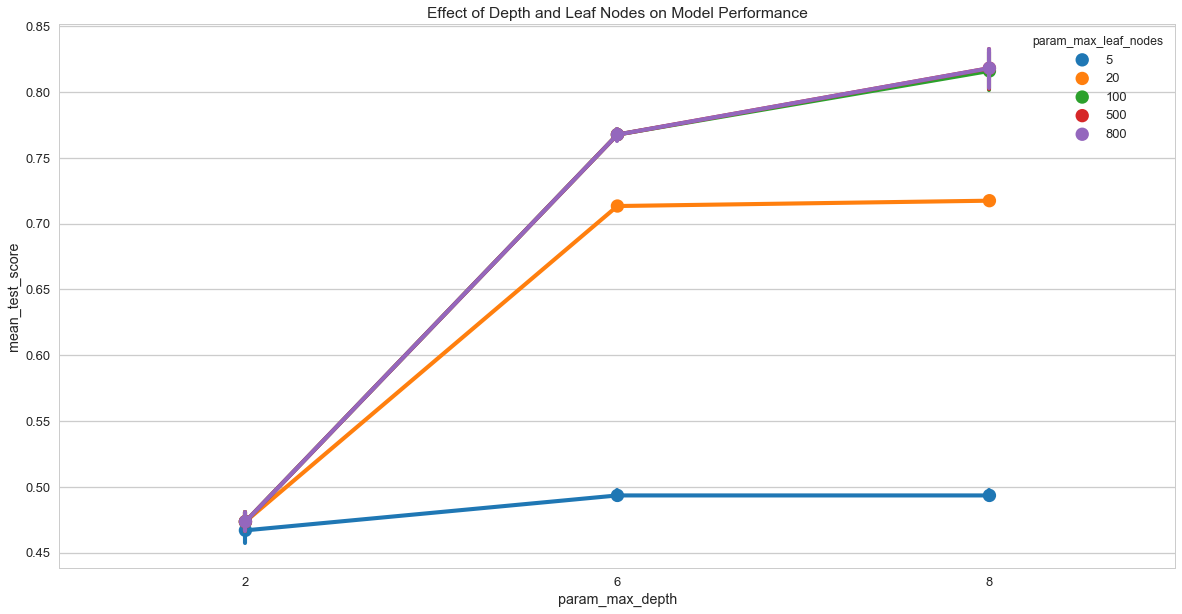

In [50]:
#It important to understand that grid search with cross validation was optimizing on finding the best set
#of hyperparameters that can help prepare a generalizable Decision Tree Regressor. It may be possible that
#there are further optimizations possible. We use seaborn to plot the impact of depth of the tree on the overall
#score along with number of leaf nodes. The following snippet uses the same dataframe we prepared using
#cv_results_ attribute of GridSearchCV object discussed previously.

fig,ax = plt.subplots(figsize=(20,10))
sn.pointplot(data=df[['mean_test_score','param_max_leaf_nodes','param_max_depth']],
             y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")

## Residual Plot

In [51]:
#The output shows a sudden improvement in score as depth increases from 2 to 6 while a gradual
#improvement as we reach 8 from 6. The impact of number of leaf nodes is rather interesting. The difference
#in scores between 100 and 800 leaf nodes is strikingly not much. This is a clear indicator that further finetuning
#is possible.

#As mentioned, there is still scope of fine-tuning to further improve the results. It is therefore a decision
#which is use case and cost dependent. Cost can be in terms of effort, time and corresponding improvements
#achieved. For now, we’ll proceed with the best model our GridSearchCV object has helped us identify

predicted = grid_cv_dtr.best_estimator_.predict(X)
residuals = y.flatten()-predicted

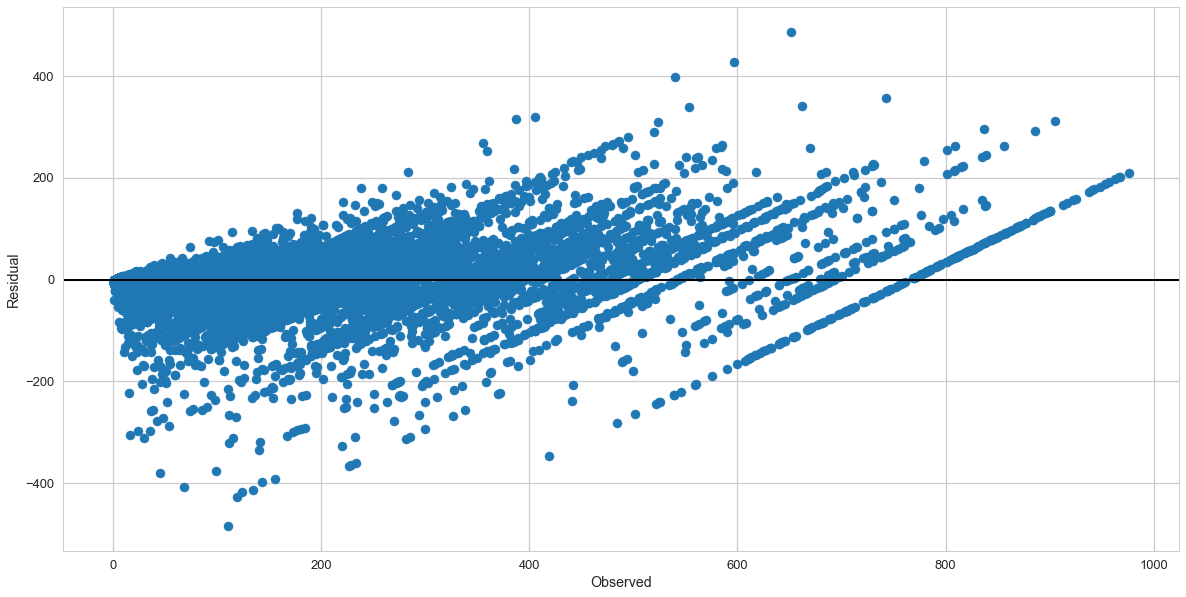

In [52]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(y.flatten(), residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [53]:
r2_scores = cross_val_score(grid_cv_dtr.best_estimator_, X, y, cv=10)
mse_scores = cross_val_score(grid_cv_dtr.best_estimator_, X, y, cv=10,scoring='neg_mean_squared_error')

In [54]:
print("avg R-squared::{}".format(np.mean(r2_scores)))
print("MSE::{}".format(np.mean(mse_scores)))

avg R-squared::0.8634248558271074
MSE::-4546.672728309535


## Setting the model for Testing

In [55]:
best_dtr_model = grid_cv_dtr.best_estimator_

## Test Dataset Performance

In [57]:
#Once we have a model trained with optimized hyperparameters, we can begin with our usual workflow to
#test performance on an unseen dataset. We will utilize the same preprocessing as discussed while preparing
#test set for linear regression

test_encoded_attr_list = []
for enc in encoded_attr_list:
    col_name = enc['col_name']
    le = enc['label_enc']
    ohe = enc['ohe_enc']
    test_encoded_attr_list.append({'feature_df':transform_ohe(X_test,le,ohe,col_name),
                                   'col_name':col_name})
    
test_feature_df_list = [X_test[numeric_feature_cols]]
test_feature_df_list.extend([enc['feature_df'] for enc in test_encoded_attr_list if enc['col_name'] in subset_cat_features])

test_df_new = pd.concat(test_feature_df_list, axis=1) 
print("Shape::{}".format(test_df_new.shape))

Shape::(5736, 19)


In [58]:
X_test = test_df_new
y_test = y_test.total_count.values.reshape(-1,1)

In [59]:
#The following snippet predicts the output values for the test
#dataset using the best estimator achieved during training phase

y_pred = best_dtr_model.predict(X_test)
residuals = y_test.flatten() - y_pred

In [60]:
#The final step is to view the R-squared score on this dataset. A well-fit model should have comparable
#performance on this set as well
r2_score = best_dtr_model.score(X_test,y_test)
print("R-squared::{}".format(r2_score))
print("MSE: %.2f"
      % metrics.mean_squared_error(y_test, y_pred))

R-squared::0.8722059567160857
MSE: 4076.82


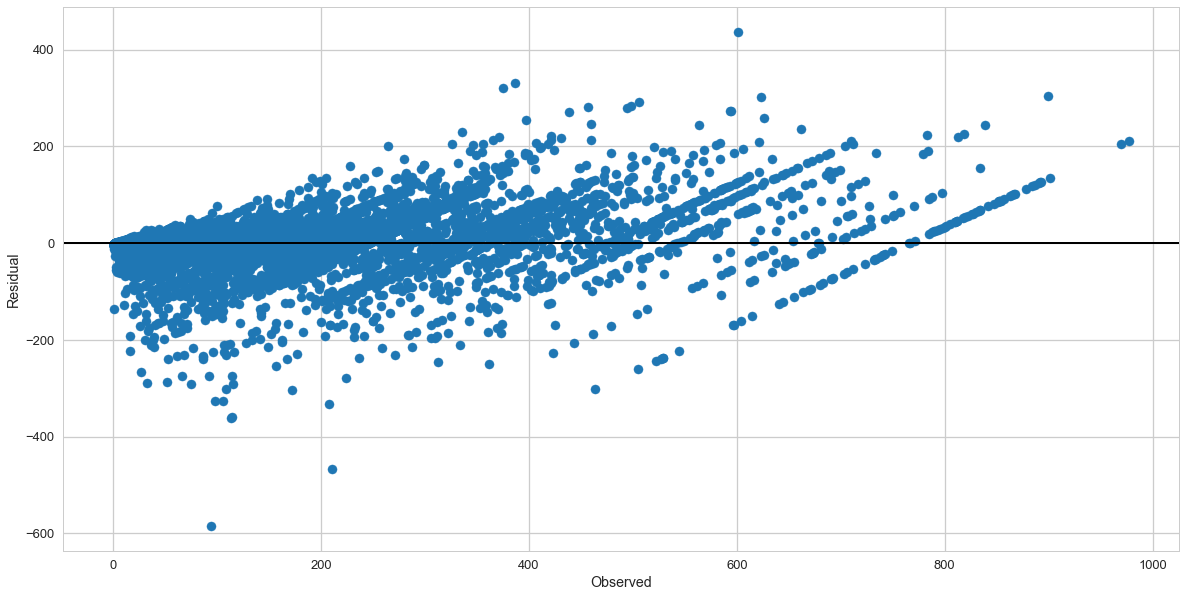

In [61]:
#As is evident from the R-squared value, the performance is quite comparable to our training
#performance. We can conclude by saying Decision Tree Regressor was better at forecasting bike demand as
#compared to linear regression.

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(y_test.flatten(), residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

r2_score = grid_cv_dtr.best_estimator_.score(X_test,y_test)